Original Data no relU
    * file 163 Mb (around)
    * time 17' calcs // 0'' file (around)
    * deep features 4096
       
Original Data no relU with pca
    * file 8 Mb (around)
    * time 51'' calcs // 2'' file (around)
    * pca features 200 (aprox)


In [1]:
PATH_TO_LABELS_FILE = "../data/output_dataset"
LABELS = "img_labels"

PATH_TO_DF = "../data/output_convnet/VGG16"
# DF_MAP = "VGG16_dfmap_relU_pickle" # with relU activation function
DF_MAP = "VGG16_dfmap_no_relU_pickle" # without activation function

In [2]:
import os
import pickle

labels = []

with open(os.path.join(PATH_TO_LABELS_FILE,LABELS),'r') as f_img_labels:
    for line in f_img_labels:
        labels.append(line[:-1])

features = pickle.load(open(os.path.join(PATH_TO_DF,DF_MAP),'rb'))

In [3]:
import numpy as np

features_arr = np.array(features)
labels_arr = np.array(labels)

In [4]:
print("Deep features - deep feature map")
print()
print("Structure dims: {0:d} x {1:d}".format(features_arr.shape[0], features_arr.shape[1]))
print()
print("N of deep features arrays (images): ", features_arr.shape[0])
print()
print("N of deep features: ",features_arr.shape[1])
print()
print(features_arr) # array with deep features
print()
print()
print("Image's labels")
print()
print("Structure: ", type(labels_arr))
print()
print("Nº of image labels (images): ", len(labels_arr))
print()
print(labels_arr) # img's label

features_arr = features_arr.T # n x m matrix!

Deep features - deep feature map

Structure dims: 5000 x 4096

N of deep features arrays (images):  5000

N of deep features:  4096

[[  1.4363389   -9.70764256 -14.33625031 ...,  -0.2988835   -4.04614496
   -2.43703127]
 [ -6.25107241  -8.4447031  -11.96656322 ...,   0.47403866  -4.45992088
   -8.00944138]
 [  7.5820446  -21.92349815  -4.70616055 ...,   9.63796329  -3.06682301
  -17.91776276]
 ..., 
 [ -4.1283865    1.40950263  -4.15737724 ...,   0.21009497  -0.19954918
   -1.71088219]
 [ -3.73391938  -0.72124833  -5.90556002 ...,   0.99256498  -0.52596283
   -2.18934989]
 [ -2.97715545   0.57167876  -6.36512375 ...,  -1.06647027  -1.3277365
   -3.27218819]]


Image's labels

Structure:  <class 'numpy.ndarray'>

Nº of image labels (images):  5000

['01_TUMOR' '01_TUMOR' '01_TUMOR' ..., '08_EMPTY' '08_EMPTY' '08_EMPTY']


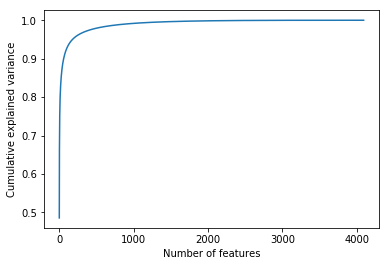

00:00:47


In [5]:
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline


ti_pca = time.time()

features_model_pca = PCA().fit(features_arr) # model

# plot
plt.plot(np.cumsum(features_model_pca.explained_variance_ratio_))
plt.xlabel('Number of features')
plt.ylabel('Cumulative explained variance')

plt.savefig(os.path.join(PATH_TO_DF, "VGG16_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb
plt.show()


tf_pca = time.time()
tt_pca = tf_pca - ti_pca
print(time.strftime("%H:%M:%S", time.gmtime(tt_pca)))

In [6]:
# arange() does not work properly?

for i in np.arange(0.7,1,0.05):
    print("With %d features we get %f of cumulative explicative variance." % \
          (np.argmax(features_model_pca.explained_variance_ratio_.cumsum() > i), i))

With 4 features we get 0.700000 of cumulative explicative variance.
With 6 features we get 0.750000 of cumulative explicative variance.
With 12 features we get 0.800000 of cumulative explicative variance.
With 25 features we get 0.850000 of cumulative explicative variance.
With 59 features we get 0.900000 of cumulative explicative variance.
With 178 features we get 0.950000 of cumulative explicative variance.
With 0 features we get 1.000000 of cumulative explicative variance.


In [7]:
ti_pca = time.time()

features_model_pca = PCA(n_components=200) # fixed number of features
features_model_pca.fit(features_arr)


tf_pca = time.time()
tt_pca = tf_pca - ti_pca
print(time.strftime("%H:%M:%S", time.gmtime(tt_pca)))

00:00:02


In [8]:
# transpose again the matrix
# pickle.dump(features_model_pca.components_.T,\
#             open(os.path.join(PATH_TO_DF,"VGG16_dfmap_relU_pca_pickle"), 'wb')) # with relU 33.7Mb
pickle.dump(features_model_pca.components_.T,\
            open(os.path.join(PATH_TO_DF,"VGG16_dfmap_no_relU_pca_pickle"), 'wb')) # without relU